In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# CAS Data Science Projekt Sleep Analysis - Linear Regression

# Prepare data


In [18]:
data = pd.read_csv('prepared/fitbit_data_moon_crisp.csv', index_col=0)
print(data.head(3))
data.dropna(inplace=True)
data.drop(columns=['date', 'revitalization_score'], inplace=True)
data.drop(columns=['restlessness'], inplace=True)
data.rename(columns={'overall_score':'score', 'duration_score':'DUS', 'deep_sleep_in_minutes':'DS', 'composition_score':'CS', 'Moon Phase': 'moon', 'skin_temp_avg':'temp','resting_heart_rate':'RHR', 'avg_bpm':"BPM"}, inplace=True)

         date  skin_temp_avg  overall_score  composition_score  \
0  2022-03-04      30.505155             67                 17   
1  2022-04-19      30.625221             75                 16   
2  2022-03-10      29.899359             88                 21   

   revitalization_score  duration_score  deep_sleep_in_minutes  \
0                    15              35                     66   
1                    17              42                     62   
2                    22              45                    126   

   resting_heart_rate  restlessness    avg_bpm     Moon Phase  
0                  60      0.073479  66.494309       New Moon  
1                  52      0.071966  58.762171            NaN  
2                  60      0.054695  60.620142  First Quarter  


In [19]:
data.head(5)

,temp,score,CS,DUS,DS,RHR,BPM,moon
0,30.505155,67,17,35,66,60,66.494309,New Moon
2,29.899359,88,21,45,126,60,60.620142,First Quarter
3,29.917705,56,15,26,23,56,60.969515,Third Quarter
4,30.016326,75,20,36,69,55,59.398694,First Quarter
5,30.858560,68,19,31,69,60,58.885041,New Moon


In [20]:
mod = smf.ols(formula='score ~ CS + DUS + DS + RHR + BPM + moon + temp', data=data).fit()

In [21]:
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     65.75
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           1.59e-39
Time:                        14:56:54   Log-Likelihood:                -259.46
No. Observations:                 117   AIC:                             538.9
Df Residuals:                     107   BIC:                             566.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 9.27

In [25]:
np.sqrt(mod.scale)


<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x1500969a0>>

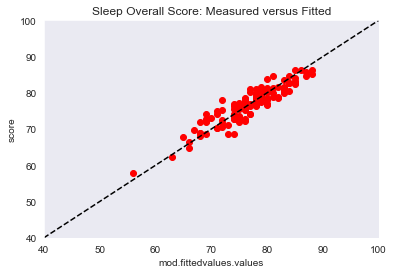

In [23]:
plt.close()

plt.scatter(data.score, mod.fittedvalues.values, color='red')
plt.xlim([40,100])
plt.ylim([40,100])
plt.grid()
plt.axhline(y=0, color='black', linewidth=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)
plt.title('Sleep Overall Score: Measured versus Fitted')
plt.xlabel('mod.fittedvalues.values')
plt.ylabel('score')
plt.axline((1, 1), slope=1, color='black', ls="--")
plt.show()



In [26]:
from statsmodels.tools.eval_measures import mse
mse(data['score'], mod.fittedvalues.values)

4.93944668736501